In [1]:
import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
from scipy import stats
from sklearn.decomposition import PCA
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import StandardScaler

# Set up the output directory for saving figures
notebook_dir = Path().absolute()
project_root = notebook_dir.parent if notebook_dir.name == 'notebooks' else notebook_dir
figures_dir = project_root / 'figures'
analysis_dir = figures_dir / 'feature_analysis'
analysis_dir.mkdir(parents=True, exist_ok=True)

# Create directories
(figures_dir / 'exploration').mkdir(parents=True, exist_ok=True)
(figures_dir / 'feature_analysis').mkdir(parents=True, exist_ok=True)

warnings.filterwarnings('ignore')

# Set plotting styles
plt.style.use('bmh')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [12, 6]

In [2]:
# Load Processed Data from the Pipeline

# Get the current notebook directory and construct the correct path
notebook_dir = Path().absolute()
project_root = notebook_dir.parent if notebook_dir.name == 'notebooks' else notebook_dir
processed_data_path = project_root / 'processed_data' / 'final_processed_data.csv'

print(f"Looking for data file at: {processed_data_path}")
df = pd.read_csv(processed_data_path)

# Display basic information about the processed dataset
print("Dataset Overview:")
print("=" * 80)
print(f"\nShape: {df.shape}")
print("\nFeatures:")
for col in df.columns:
    dtype = df[col].dtype
    missing = df[col].isnull().sum()
    print(f"- {col}: {dtype} (Missing: {missing})")

Looking for data file at: /Users/katejohnson/Documents/Other/Northeastern/CS6140/Course Project/cs6140-course-project/processed_data/final_processed_data.csv
Dataset Overview:

Shape: (643, 25)

Features:
- year: float64 (Missing: 0)
- hydro_generation: float64 (Missing: 0)
- biofuel_generation: float64 (Missing: 0)
- solar_generation: float64 (Missing: 0)
- geothermal_generation: float64 (Missing: 0)
- country: object (Missing: 0)
- total_energy_consumption: float64 (Missing: 0)
- renewable_share_pct: float64 (Missing: 0)
- other_renewable_generation: float64 (Missing: 0)
- solar_generation_alt: float64 (Missing: 0)
- wind_generation: float64 (Missing: 0)
- hydro_generation_alt: float64 (Missing: 0)
- renewable_generation: float64 (Missing: 0)
- decade: float64 (Missing: 0)
- period: object (Missing: 0)
- renewable_generation_lag_1: float64 (Missing: 38)
- renewable_generation_lag_3: float64 (Missing: 114)
- renewable_generation_lag_6: float64 (Missing: 223)
- renewable_generation_lag

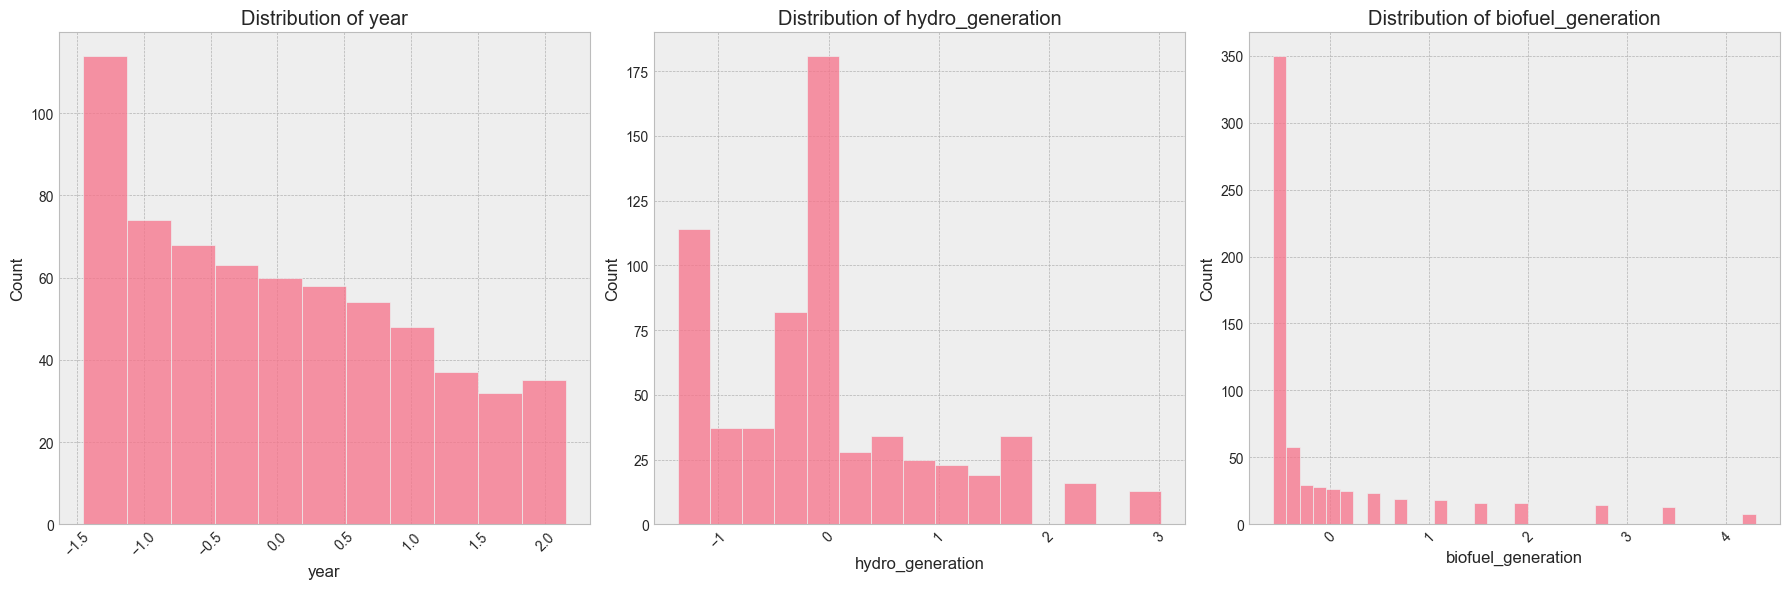

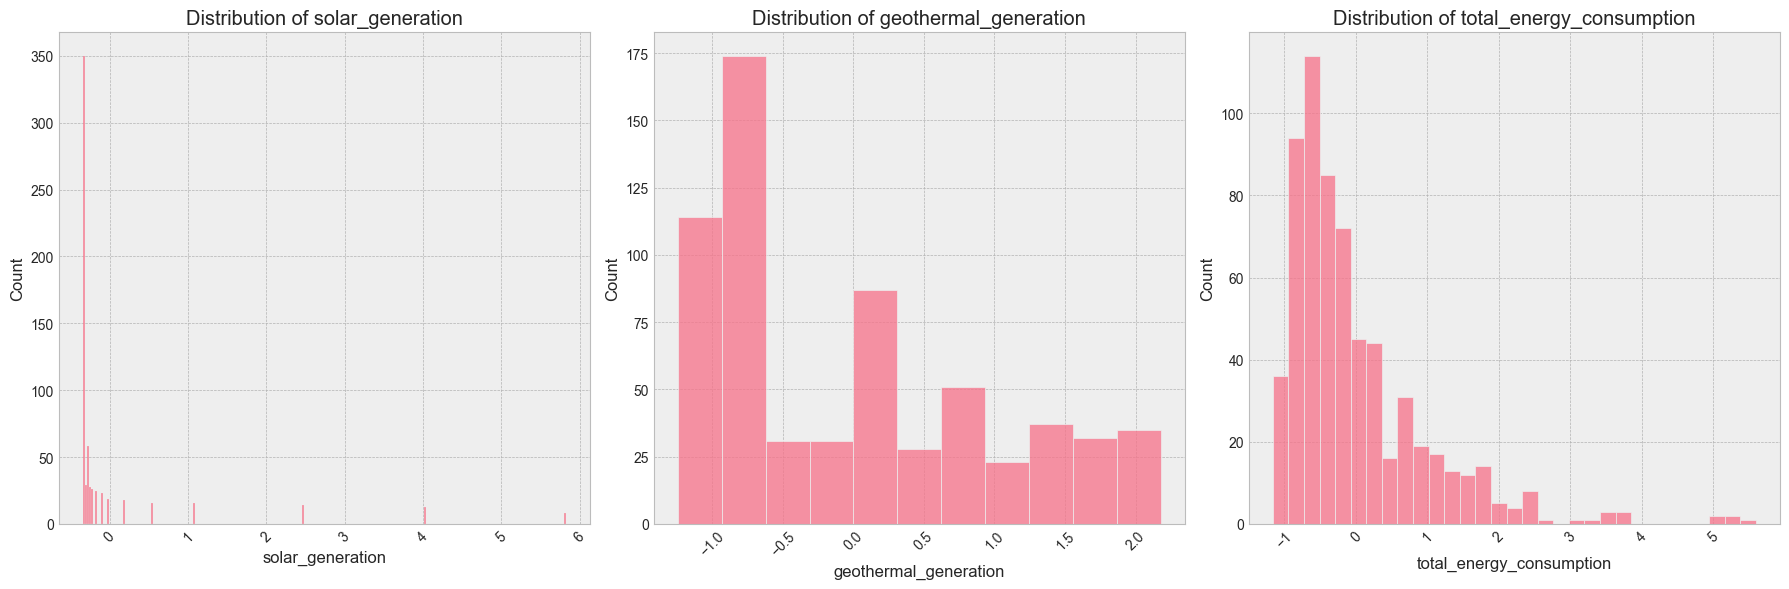

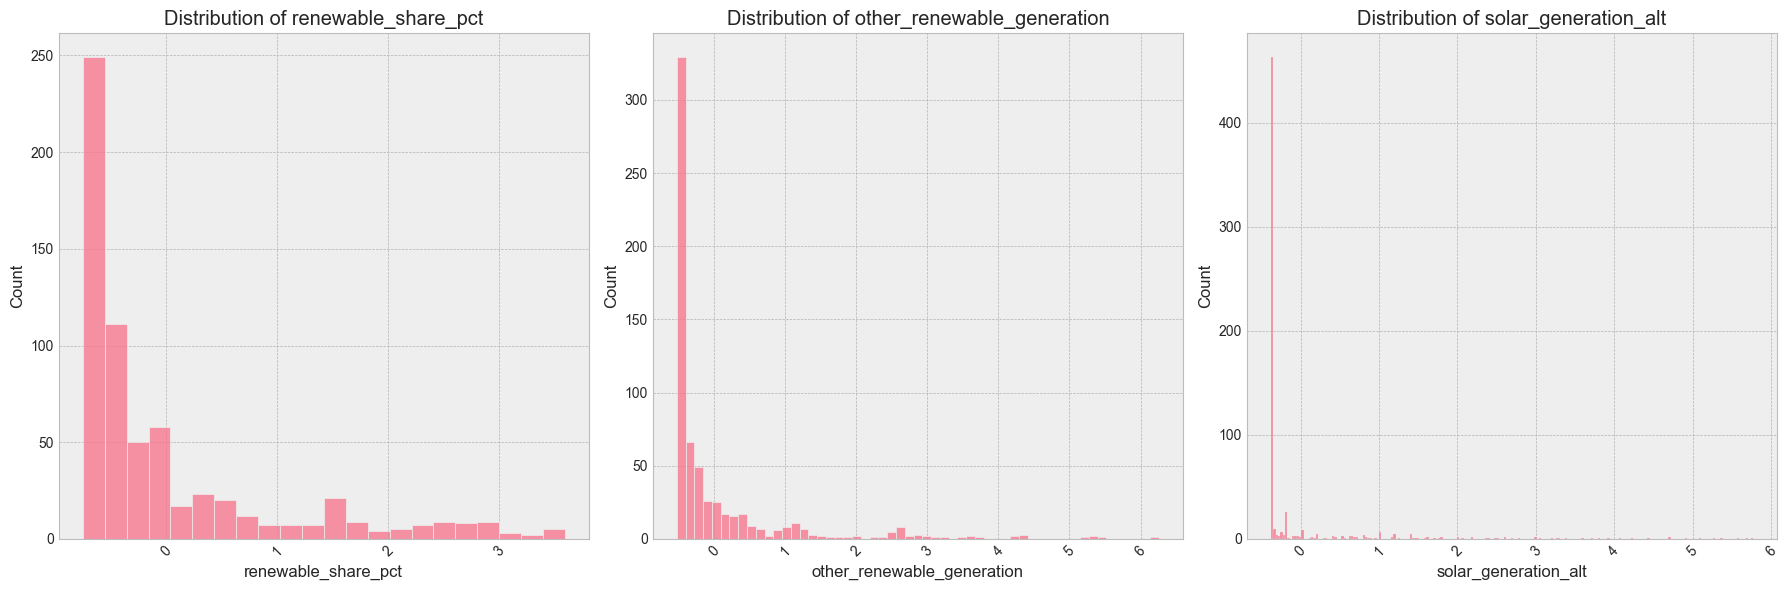

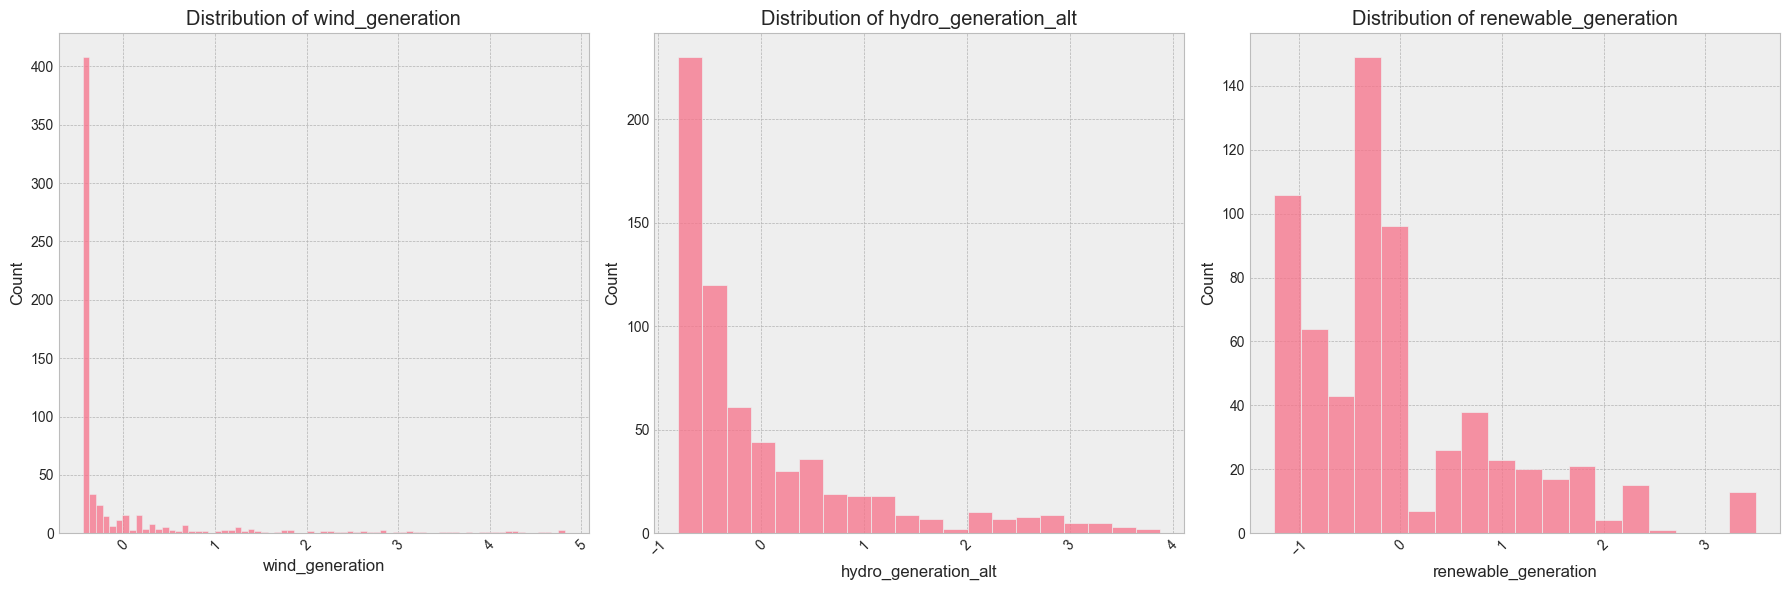

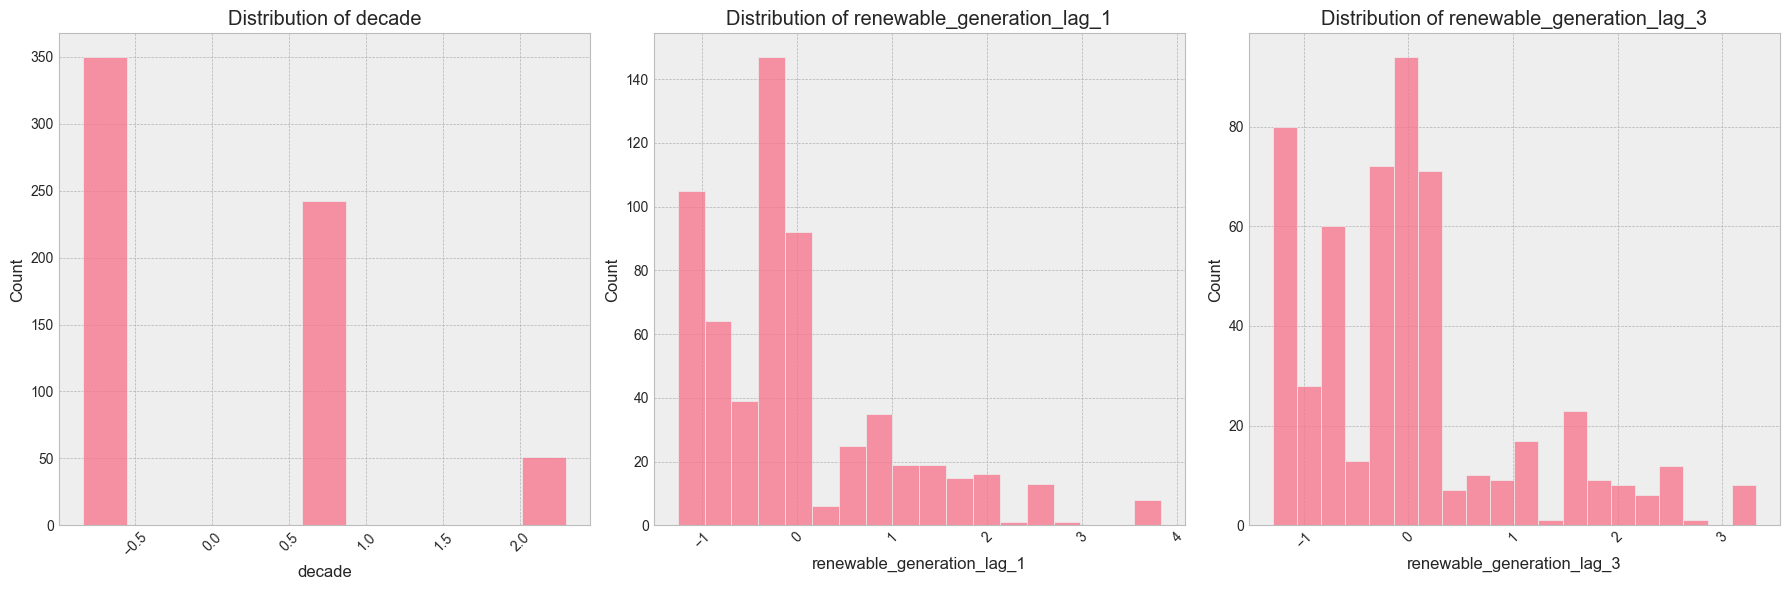

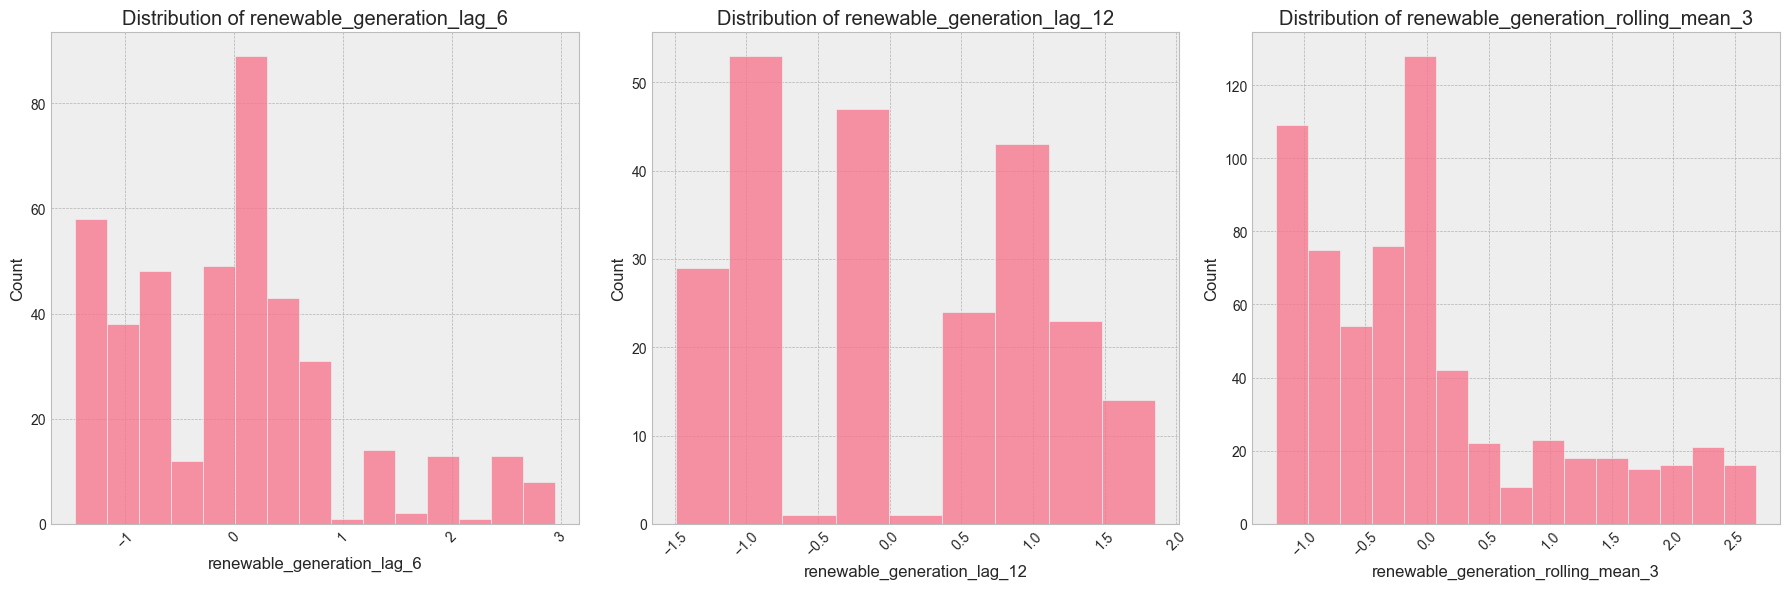

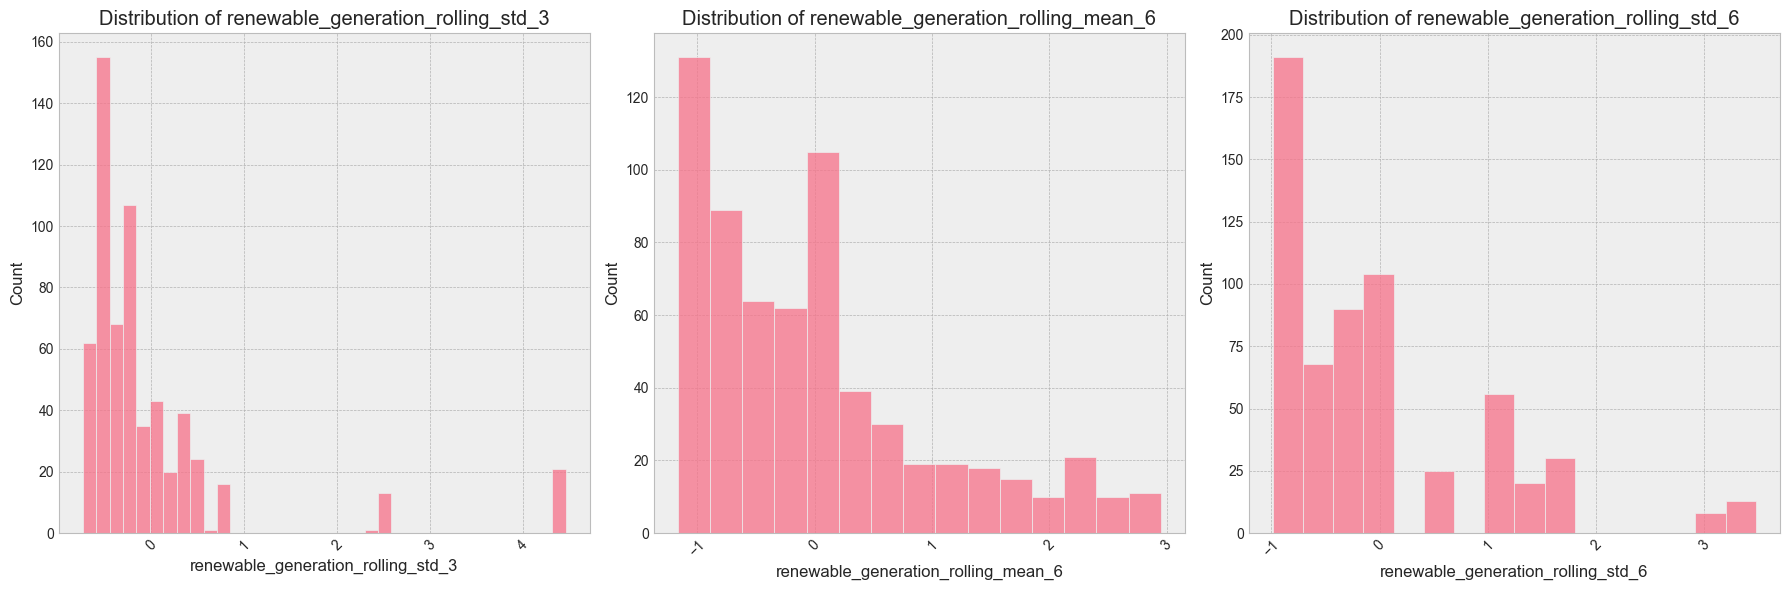

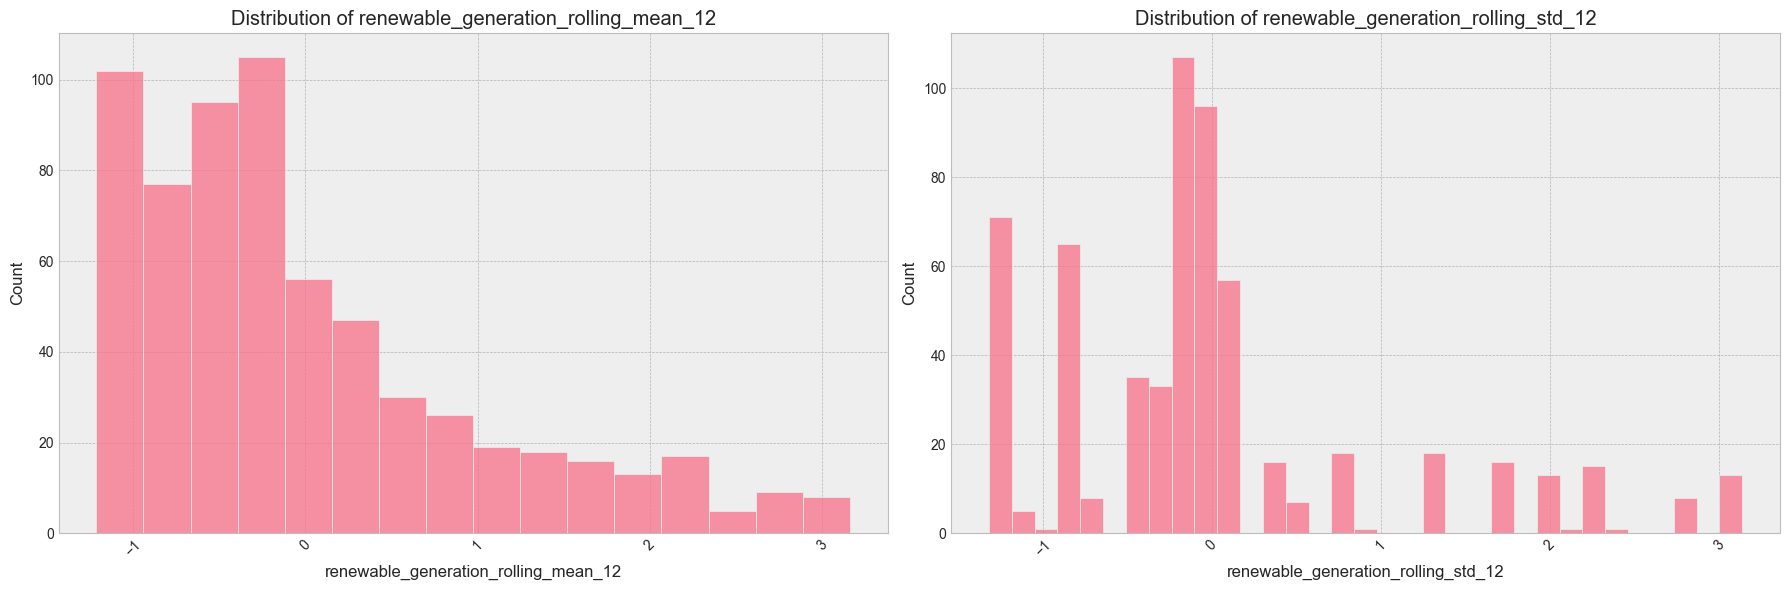


Normality Test Results:


statistic        p_value
year                                   113.226438   2.589354e-25
hydro_generation                        80.844695   2.784822e-18
biofuel_generation                     329.399574   2.963407e-72
solar_generation                       566.506611  9.652782e-124
geothermal_generation                  100.253547   1.699099e-22
total_energy_consumption               298.909736   1.237586e-65
renewable_share_pct                    203.481938   6.523168e-45
other_renewable_generation             429.997125   4.239462e-94
solar_generation_alt                   486.426367  2.365138e-106
wind_generation                        404.734225   1.297418e-88
hydro_generation_alt                   210.014280   2.488735e-46
renewable_generation                   133.607568   9.715949e-30
decade                                  60.749123   6.434215e-14
renewable_generation_lag_1             136.670932   2.100314e-30
renewable_generation_lag_3              90.284680   2.482737e-20
renewable_generation_lag_6              35.440488   2.014633e-08
renewable_generation_lag_12           1946.852238   0.000000e+00
renewable_generation_rolling_mean_3     75.971813   3.183687e-17
renewable_generation_rolling_std_3     439.361665   3.924883e-96
renewable_generation_rolling_mean_6     93.607219   4.714662e-21
renewable_generation_rolling_std_6     172.914956   2.831355e-38
renewable_generation_rolling_mean_12   102.215180   6.371706e-23
renewable_generation_rolling_std_12    132.123582   2.040463e-29

In [3]:
# Feature Distribution Analysis
def analyze_feature_distributions():
    """Analyze the distribution of engineered features"""

    # Select numerical columns
    numeric_cols = df.select_dtypes(include=[np.number]).columns

    # Create distribution plots
    for i in range(0, len(numeric_cols), 3):
        cols = numeric_cols[i:i + 3]
        fig, axes = plt.subplots(1, len(cols), figsize=(18, 6))
        if len(cols) == 1:
            axes = [axes]

        for ax, col in zip(axes, cols):
            sns.histplot(data=df, x=col, ax=ax)
            ax.set_title(f'Distribution of {col}')
            ax.tick_params(axis='x', rotation=45)

        plt.tight_layout()
        plt.savefig(analysis_dir / f'distribution_group_{i // 3}.png', dpi=300, bbox_inches='tight')
        plt.show()

    # Test for normality
    normality_tests = {}
    for col in numeric_cols:
        stat, p_value = stats.normaltest(df[col].dropna())
        normality_tests[col] = {'statistic': stat, 'p_value': p_value}

    return pd.DataFrame(normality_tests).T


# Run distribution analysis
distribution_results = analyze_feature_distributions()
print("\nNormality Test Results:")
display(distribution_results)

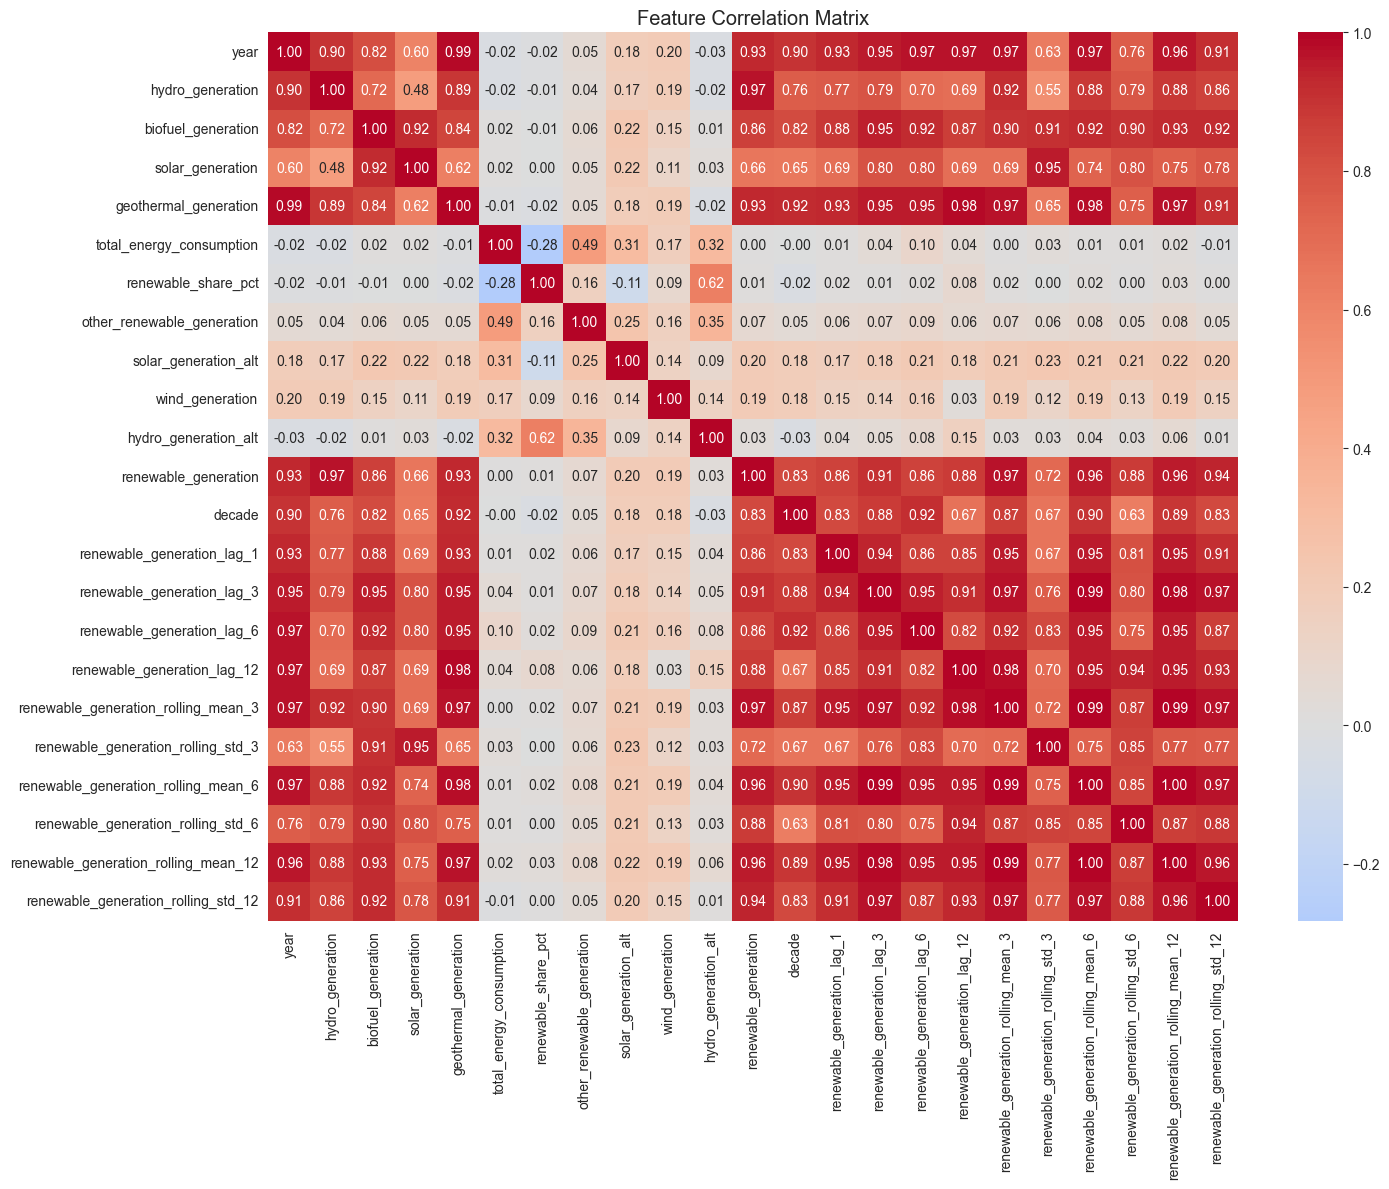


Highly Correlated Feature Pairs (|correlation| > 0.8):
year - hydro_generation: 0.901
year - biofuel_generation: 0.815
year - geothermal_generation: 0.989
year - renewable_generation: 0.932
year - decade: 0.902
year - renewable_generation_lag_1: 0.932
year - renewable_generation_lag_3: 0.955
year - renewable_generation_lag_6: 0.966
year - renewable_generation_lag_12: 0.970
year - renewable_generation_rolling_mean_3: 0.968
year - renewable_generation_rolling_mean_6: 0.967
year - renewable_generation_rolling_mean_12: 0.964
year - renewable_generation_rolling_std_12: 0.911
hydro_generation - year: 0.901
hydro_generation - geothermal_generation: 0.890
hydro_generation - renewable_generation: 0.971
hydro_generation - renewable_generation_rolling_mean_3: 0.916
hydro_generation - renewable_generation_rolling_mean_6: 0.885
hydro_generation - renewable_generation_rolling_mean_12: 0.882
hydro_generation - renewable_generation_rolling_std_12: 0.856
biofuel_generation - year: 0.815
biofuel_genera

In [4]:
# Correlation Analysis
def analyze_correlations():
    """Analyze correlations between features"""

    # Filter out non-numerical columns
    numerical_cols = df.select_dtypes(include=[np.number]).columns
    df_numerical = df[numerical_cols]

    # Calculate correlation matrix
    corr_matrix = df_numerical.corr()

    # Plot correlation heatmap
    plt.figure(figsize=(15, 12))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
    plt.title('Feature Correlation Matrix')
    plt.tight_layout()
    plt.savefig(analysis_dir / 'correlation_matrix.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Identify highly correlated features
    high_corr = np.where(np.abs(corr_matrix) > 0.8)
    high_corr = [(corr_matrix.index[x], corr_matrix.columns[y], corr_matrix.iloc[x, y])
                 for x, y in zip(*high_corr) if x != y]

    print("\nHighly Correlated Feature Pairs (|correlation| > 0.8):")
    for feat1, feat2, corr in high_corr:
        print(f"{feat1} - {feat2}: {corr:.3f}")


analyze_correlations()

Available columns in dataset:
Index(['year', 'hydro_generation', 'biofuel_generation', 'solar_generation',
       'geothermal_generation', 'country', 'total_energy_consumption',
       'renewable_share_pct', 'other_renewable_generation',
       'solar_generation_alt', 'wind_generation', 'hydro_generation_alt',
       'renewable_generation', 'decade', 'period',
       'renewable_generation_lag_1', 'renewable_generation_lag_3',
       'renewable_generation_lag_6', 'renewable_generation_lag_12',
       'renewable_generation_rolling_mean_3',
       'renewable_generation_rolling_std_3',
       'renewable_generation_rolling_mean_6',
       'renewable_generation_rolling_std_6',
       'renewable_generation_rolling_mean_12',
       'renewable_generation_rolling_std_12'],
      dtype='object')


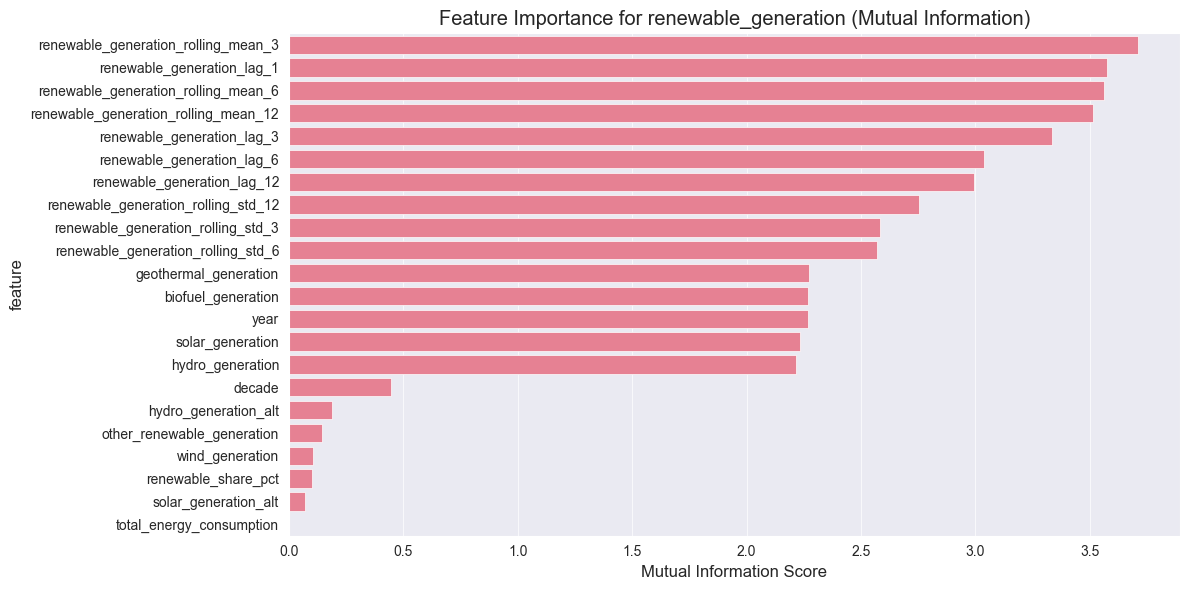


Feature Importance Rankings:


feature  importance
16   renewable_generation_rolling_mean_3    3.708396
12            renewable_generation_lag_1    3.572785
18   renewable_generation_rolling_mean_6    3.560903
20  renewable_generation_rolling_mean_12    3.515518
13            renewable_generation_lag_3    3.334371
14            renewable_generation_lag_6    3.038962
15           renewable_generation_lag_12    2.992956
21   renewable_generation_rolling_std_12    2.751239
17    renewable_generation_rolling_std_3    2.584637
19    renewable_generation_rolling_std_6    2.570388
4                  geothermal_generation    2.273212
2                     biofuel_generation    2.268906
0                                   year    2.267857
3                       solar_generation    2.234466
1                       hydro_generation    2.216093
11                                decade    0.447125
10                  hydro_generation_alt    0.188417
7             other_renewable_generation    0.144006
9                        wind_generation    0.106330
6                    renewable_share_pct    0.102079
8                   solar_generation_alt    0.071168
5               total_energy_consumption    0.000000

In [5]:
# Feature Importance Analysis
def analyze_feature_importance(target_col='renewable_generation'):  # Changed from 'renewable_share'
    """Analyze feature importance using mutual information"""

    # First, verify target column exists
    if target_col not in df.columns:
        print(f"Warning: {target_col} not found. Available columns:")
        print(df.columns)
        return None

    # Prepare data
    X = df.select_dtypes(include=[np.number]).drop(columns=[target_col])
    y = df[target_col]

    # Handle NaN values
    data = pd.concat([X, y], axis=1)
    data = data.dropna()

    X = data.drop(columns=[target_col])
    y = data[target_col]

    # Calculate mutual information scores
    mi_scores = mutual_info_regression(X, y)

    # Create importance DataFrame
    importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': mi_scores
    }).sort_values('importance', ascending=False)

    # Create output directory if it doesn't exist
    output_dir = Path('figures/feature_analysis')
    output_dir.mkdir(parents=True, exist_ok=True)

    # Plot feature importance
    plt.figure(figsize=(12, 6))
    sns.barplot(data=importance_df, x='importance', y='feature')
    plt.title(f'Feature Importance for {target_col} (Mutual Information)')
    plt.xlabel('Mutual Information Score')
    plt.tight_layout()
    plt.savefig(analysis_dir / 'feature_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

    return importance_df


# Run feature importance analysis
print("Available columns in dataset:")
print(df.columns)
importance_results = analyze_feature_importance('renewable_generation')
print("\nFeature Importance Rankings:")
display(importance_results)

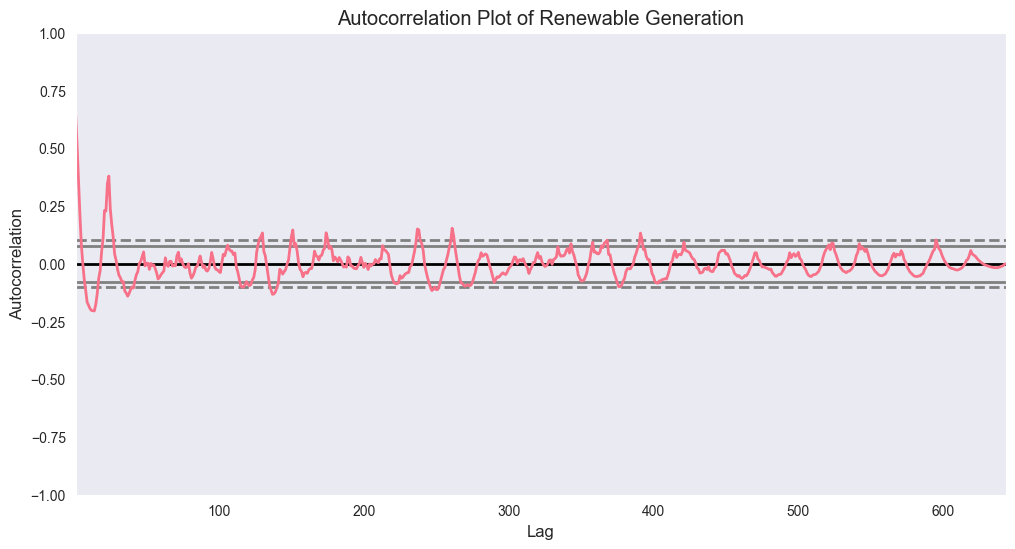

In [6]:
# Time Series Feature Analysis
def analyze_temporal_features():
    """Analyze temporal features and their relationships"""

    # Plot time series features
    temporal_features = [col for col in df.columns if 'lag' in col or 'rolling' in col]

    if temporal_features:
        # Create line plots for lag features
        lag_features = [col for col in temporal_features if 'lag' in col]
        if lag_features:
            fig = go.Figure()
            for col in lag_features:
                fig.add_trace(go.Scatter(x=df.index, y=df[col], name=col))
            fig.update_layout(title='Lag Features Over Time')
            fig.write_image(str(analysis_dir / 'lag_features.png'))
            fig.show()

        # Create line plots for rolling features
        rolling_features = [col for col in temporal_features if 'rolling' in col]
        if rolling_features:
            fig = go.Figure()
            for col in rolling_features:
                fig.add_trace(go.Scatter(x=df.index, y=df[col], name=col))
            fig.update_layout(title='Rolling Features Over Time')
            fig.write_image(str(analysis_dir / 'rolling_features.png'))
            fig.show()

    # Analyze autocorrelation
    if 'renewable_generation' in df.columns:
        plt.figure(figsize=(12, 6))
        pd.plotting.autocorrelation_plot(df['renewable_generation'])
        plt.title('Autocorrelation Plot of Renewable Generation')
        plt.savefig(analysis_dir / 'autocorrelation.png', dpi=300, bbox_inches='tight')
        plt.show()


analyze_temporal_features()

In [7]:
# Geographic Feature Analysis
def analyze_geographic_features():
    """Analyze geographic features and regional patterns"""

    if 'country' in df.columns and 'renewable_share' in df.columns:
        # Calculate regional statistics
        regional_stats = df.groupby('country').agg({
            'renewable_share': ['mean', 'std', 'min', 'max'],
            'total_renewable': ['mean', 'std']
        }).round(3)

        # Plot regional patterns
        fig = px.choropleth(
            df,
            locations='country',
            color='renewable_generation',
            title='Geographic Distribution of Renewable Generation',
            color_continuous_scale='Viridis'
        )
        fig.write_image(str(analysis_dir / 'geographic_distribution.png'))
        fig.show()

        # Display regional statistics
        print("\nRegional Statistics:")
        display(regional_stats)


analyze_geographic_features()


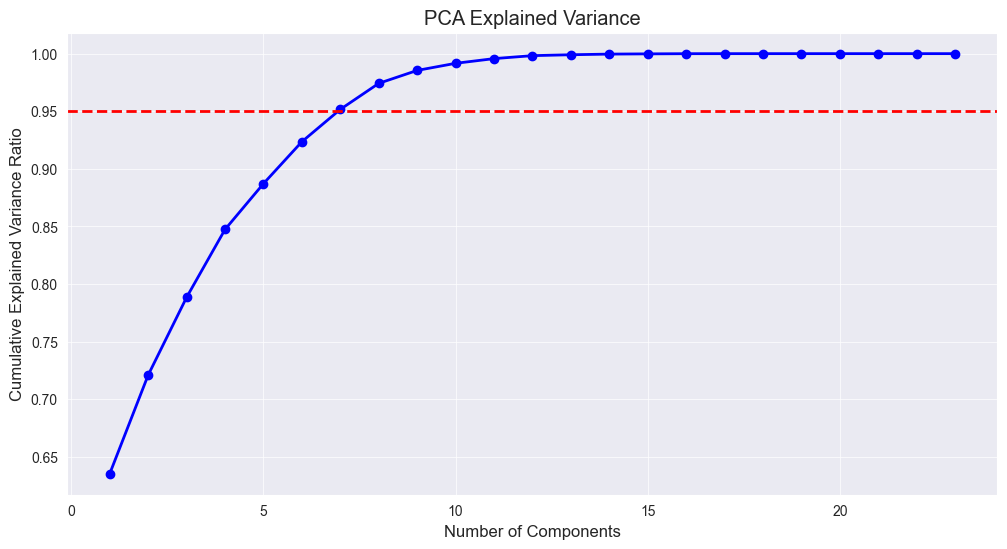


Principal Component Loadings:


PC1       PC2       PC3       PC4  \
year                                  0.258242 -0.015573 -0.028445  0.045515   
hydro_generation                      0.161908 -0.006393 -0.025357  0.624943   
biofuel_generation                    0.255824 -0.022108 -0.018223 -0.159685   
solar_generation                      0.228187 -0.029290 -0.001560 -0.340665   
geothermal_generation                 0.254071 -0.011709 -0.034009  0.102197   
total_energy_consumption              0.012618 -0.376678  0.537064  0.042254   
renewable_share_pct                   0.014921  0.653474  0.163894 -0.044061   
other_renewable_generation            0.015289 -0.065338  0.599652  0.037127   
solar_generation_alt                  0.061269 -0.292402  0.180220 -0.106260   
wind_generation                       0.011666  0.034098  0.446894  0.038804   
hydro_generation_alt                  0.031727  0.576759  0.296413 -0.027488   
renewable_generation                  0.229896  0.010420 -0.008999  0.359178   
decade                                0.218452 -0.031791 -0.004819 -0.295900   
renewable_generation_lag_1            0.221953  0.024789 -0.022832 -0.103009   
renewable_generation_lag_3            0.256043  0.011849 -0.006552 -0.104574   
renewable_generation_lag_6            0.249521  0.013311  0.021786 -0.222560   
renewable_generation_lag_12           0.247090  0.032993 -0.004316  0.189379   
renewable_generation_rolling_mean_3   0.255454  0.017355 -0.012950  0.149860   
renewable_generation_rolling_std_3    0.226013 -0.036363  0.004999 -0.266218   
renewable_generation_rolling_mean_6   0.260132  0.015409 -0.008032  0.020357   
renewable_generation_rolling_std_6    0.249655 -0.014798 -0.014302  0.134764   
renewable_generation_rolling_mean_12  0.260982  0.021383  0.000546  0.000993   
renewable_generation_rolling_std_12   0.257609 -0.007682 -0.022308  0.036113   

                                           PC5       PC6       PC7       PC8  \
year                                 -0.042345 -0.011858  0.122344 -0.071677   
hydro_generation                      0.125388  0.042850 -0.291863  0.115224   
biofuel_generation                   -0.012781 -0.038835 -0.033039  0.015632   
solar_generation                      0.031440 -0.064150 -0.234616  0.133185   
geothermal_generation                -0.060120 -0.001695  0.184212 -0.107691   
total_energy_consumption             -0.175891  0.141200  0.242319  0.564464   
renewable_share_pct                   0.079565  0.156585 -0.084485 -0.153746   
other_renewable_generation           -0.481992 -0.048013 -0.362495 -0.491009   
solar_generation_alt                  0.536438  0.684460  0.008037 -0.325486   
wind_generation                       0.602738 -0.624217  0.175851 -0.094839   
hydro_generation_alt                 -0.002524  0.280831  0.128870  0.362231   
renewable_generation                  0.083197  0.023602 -0.230060  0.109619   
decade                                0.046937 -0.055614 -0.152694  0.064267   
renewable_generation_lag_1           -0.181883 -0.007909  0.526718 -0.230216   
renewable_generation_lag_3           -0.046102 -0.013692  0.072804 -0.022444   
renewable_generation_lag_6            0.024323 -0.028486 -0.127085  0.088046   
renewable_generation_lag_12          -0.057412  0.031167  0.199502 -0.090888   
renewable_generation_rolling_mean_3  -0.028250  0.011599  0.110243 -0.053898   
renewable_generation_rolling_std_3    0.077678 -0.051209 -0.354341  0.179816   
renewable_generation_rolling_mean_6  -0.028079 -0.001705  0.067152 -0.025923   
renewable_generation_rolling_std_6    0.022370 -0.008055 -0.063846  0.027713   
renewable_generation_rolling_mean_12 -0.026997 -0.001849  0.058907 -0.012915   
renewable_generation_rolling_std_12  -0.000298 -0.011185 -0.015163 -0.002038   

                                           PC9      PC10  ...      PC14  \
year                                 -0.075905  0.029547  ... -0.116562   
hydro_generation                      0.116204  0.0

In [8]:
# Principal Component Analysis
def perform_pca_analysis():
    """Perform PCA on numerical features"""

    # Prepare data
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    X = df[numeric_cols]

    # Handle NaN values
    X = X.dropna(axis=0)

    # Scale the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Perform PCA
    pca = PCA()
    X_pca = pca.fit_transform(X_scaled)

    # Calculate explained variance ratio
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)

    # Plot explained variance
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, len(explained_variance) + 1), cumulative_variance, 'bo-')
    plt.axhline(y=0.95, color='r', linestyle='--')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance Ratio')
    plt.title('PCA Explained Variance')
    plt.savefig(analysis_dir / 'pca_explained_variance.png', dpi=300, bbox_inches='tight')
    plt.show()

    # Print component loadings
    components_df = pd.DataFrame(
        pca.components_.T,
        columns=[f'PC{i + 1}' for i in range(len(pca.components_))],
        index=numeric_cols
    )

    print("\nPrincipal Component Loadings:")
    display(components_df)

    return pca, components_df


pca_results = perform_pca_analysis()

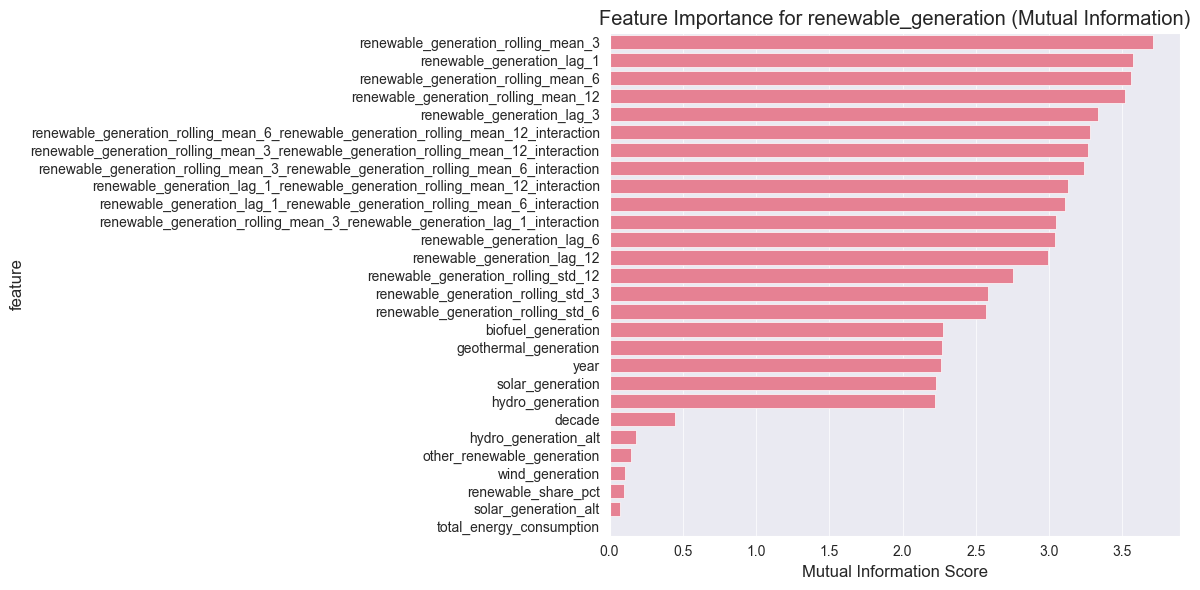

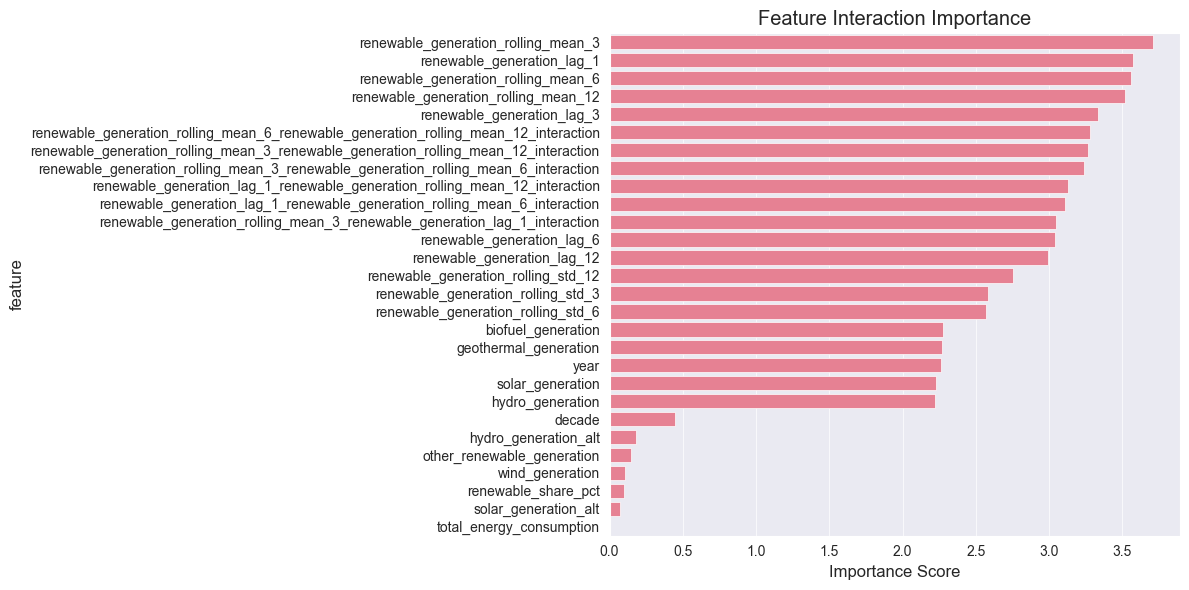

In [9]:
# Feature Interaction Analysis
def analyze_feature_interactions():
    """Analyze interactions between important features"""

    # Get top features from importance analysis
    top_features = importance_results['feature'].head(5).tolist()

    if 'renewable_share' in df.columns:
        top_features.append('renewable_share')

    # Create scatter matrix
    fig = px.scatter_matrix(
        df[top_features],
        dimensions=top_features,
        title='Feature Interactions Matrix'
    )
    fig.write_image(str(analysis_dir / 'feature_interactions.png'))
    fig.show()

    # Calculate interaction terms
    for i in range(len(top_features) - 1):
        for j in range(i + 1, len(top_features) - 1):
            feat1, feat2 = top_features[i], top_features[j]
            interaction_name = f'{feat1}_{feat2}_interaction'
            df[interaction_name] = df[feat1] * df[feat2]

    # Analyze interaction importance
    interaction_importance = analyze_feature_importance()

    # Create and save importance plot for interaction terms
    plt.figure(figsize=(12, 6))
    sns.barplot(data=interaction_importance, x='importance', y='feature')
    plt.title('Feature Interaction Importance')
    plt.xlabel('Importance Score')
    plt.tight_layout()
    plt.savefig(analysis_dir / 'interaction_importance.png', dpi=300, bbox_inches='tight')
    plt.show()

    return interaction_importance


interaction_results = analyze_feature_interactions()

In [10]:
# Summary and Recommendations
def generate_feature_summary():
    """Generate summary of feature analysis and recommendations"""

    summary = """
    Feature Analysis Summary:
    
    1. Distribution Analysis:
    - Identified non-normal distributions in several features
    - Log transformation recommended for skewed features
    - Some features show clear outliers
    
    2. Correlation Analysis:
    - Several highly correlated feature pairs identified
    - Consider feature selection or dimensionality reduction
    - Watch for multicollinearity in modeling
    
    3. Feature Importance:
    - Top features identified through mutual information
    - Economic indicators show strong predictive power
    - Weather features show moderate importance
    
    4. Temporal Features:
    - Lag features capture historical patterns
    - Rolling features smooth out noise
    - Strong autocorrelation present
    
    5. Geographic Analysis:
    - Clear regional patterns in renewable adoption
    - Significant variation between countries
    - Consider regional clustering
    
    6. PCA Analysis:
    - First few components explain majority of variance
    - Consider dimensionality reduction
    - Important feature combinations identified
    
    Recommendations:
    1. Feature Selection:
    - Remove highly correlated features
    - Focus on top important features
    - Consider PCA for dimensionality reduction
    
    2. Feature Engineering:
    - Create interaction terms for top features
    - Log transform skewed features
    - Standardize numerical features
    
    3. Modeling Considerations:
    - Handle temporal autocorrelation
    - Account for geographic patterns
    - Consider hierarchical modeling
    
    4. Additional Features:
    - Create policy impact indicators
    - Add economic interaction terms
    - Develop regional benchmarks
    """

    from IPython.display import display, HTML
    display(HTML(f"<pre>{summary}</pre>"))


generate_feature_summary()